<a href="https://colab.research.google.com/github/nervaljunior/AI-SolverNet-Deep-Learning-for-Dataset/blob/main/CidadesEmEstadoCritico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cabeçalho

<div align="center">
<center><img src="https://eloconcursos.com.br/_arquivos/imagens/10564747415991c74f9a2443.41388016.jpg" width="120px"/></center>
UNIVERSIDADE FEDERAL DO MARANHÃO – UFMA <br>
CENTRO DE CIÊNCIAS EXATAS E TECNOLOGIA – CCET <br>
DISCIPLINA: INTELIENCIA ARTIFICIAL <br>
CIENCIA DA COMPUTAÇÃO
</div>

<br><br>
<div align="center">
NERVAL DE JESUS SANTOS JUNIOR<br>
FELIPE ROGERIO SILVA TELES<br>
JOÃO LEONARDO PAIXÃO DE OLIVEIRA<br>
RODRIGO PONTES OLIVEIRA<br>
<div align="center">Discentes</div>
<br>




<center>TIAGO BONINI BORCHARTT</center><br>
<center>Docente Responsável</center>
</div>




## <center>IMPLEMENTAÇÃO DE REDES NEURAIS PARA GERAÇÃO DO MODELO DE SOLUÇÃO DO ÍNDICE DE FIRJAN</center>












### <center>São Luís - MA </center>

### <center>2023</center>


# Inteligência Artificial
## Trabalho Final 2023.1


###A implementação da rede neural servirá para estimar valores do indice de firjan.

#### Para isso faz-se necessario coletar dados necessarios para o treinamento da rede neural.

### Dividir a base de dados em um conjunto de dados de treino e de validação

o conjunto de base de treino é utilizado para o treino da rede neural enquando o de validação avaliar o desempenho da rede neural treinada


## importando bibliotecas importantes para analise e manipulação do dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## carregamento do arquivo da base de dados de treinamento


In [4]:
df_treinamento_supervisionado = pd.read_csv('/content/drive/MyDrive/IA/Base_Treinamento_Supervisionado.csv', encoding="ISO-8859-1",sep=";")
df_treinamento_supervisionado.tail()

,Município,IFGF,Total de receitas realizadas (R$x1000),Total de despesas empenhadas (R$x1000),IDHm,PIB per capita,Percentual das receitas oriundas de fontes externas (%),Área territorial,População,Pessoal ocupado,Percentual população ocupada,Área Urbanizada,Salário Médio dos trabalhadores (xSalário mínimo),Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,Mortalidade Infantil
166,Vargem Grande,"0,297","95867,34","92155,89","0,542","6630,45",NaN,1958702,57813,2575,"4,5","7,96",2,8200,1740,346,136,"9,78"
167,Viana,"0,3078","92120,11","89952,74","0,618","8663,99","94,8",1166745,52852,2521,"4,8","8,8","1,9",8708,2298,511,94,"14,07"
168,Vitória do Mearim,"0,433","92120,11","60752,47","0,596","7895,55","91,5",716719,32956,1558,"4,7","6,4","1,9",5296,1685,361,72,"10,89"
169,Vitorino Freire,"0,3137","92120,11","62014,71","0,57","8444,18",NaN,1193385,31520,2098,"6,7","6,57",2,4563,1367,375,67,"16,24"
170,Zé Doca,"0,5691","92120,11","84989,72","0,595","8779,78","96,2",2140109,52190,3225,"6,2","11,31","1,7",7021,1852,483,154,"19,89"


É possivel observar  no dataset tabelas com valores que utilizaremos para serem as entradas para nossa rede neural

### fazendo o casting dos valores do IFGF

In [5]:
df_treinamento_supervisionado['IFGF'].replace(',','.',regex=True)

0      0.6772
1      0.2418
2       0.387
3      0.4069
4      0.3227
        ...  
166     0.297
167    0.3078
168     0.433
169    0.3137
170    0.5691
Name: IFGF, Length: 171, dtype: object

## Carregamento da base de dados que aplicaremos o modelo criado

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  queremos encontrar os valores do <code>IFGF</code> que estão com <code>?</code> indicados abaixo

In [97]:

df_base_de_dados = pd.read_csv('/content/drive/MyDrive/IA/base_de_avaliacao.csv',sep=";")
df_base_de_dados.head()

,Município,IFGF,Total de receitas realizadas (R$x1000),Total de despesas empenhadas (R$x1000),IDHm,PIB per capita,Percentual das receitas oriundas de fontes externas (%),Área territorial,População,Pessoal ocupado,Percentual população ocupada,Área Urbanizada,Salário Médio dos trabalhadores (xSalário mínimo),Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,Mortalidade Infantil
0,Alto Alegre do Maranhão,?,"48180,12","47273,24","0,554","8770,52","95,4",392750,28066,978,"3,5","6,56","1,5",4260,1166,276,46,"15,11"
1,Arame,?,"69273,85","71709,47","0,521","5902,11",NaN,1789730,47095,2146,"4,6","9,38","2,1",6620,1450,446,78,"12,68"
2,Barão de Grajaú,?,"39740,96","40114,7","0,592","11816,72","97,5",2209414,19026,1581,"8,4","5,19","1,6",2571,735,190,52,"14,98"
3,Cajari,?,"41227,11","34447,37","0,523","5748,61","98,5",662066,19521,642,"3,3","2,04","1,7",3413,673,311,26,"19,61"
4,Conceição do Lago-Açu,?,"35309,92","33722,37","0,512","8146,21","99,1",725664,16559,787,"4,8","2,28","2,4",3428,423,260,17,"20,75"


### Fazendo importação do tensorflow

In [98]:
import tensorflow as tf

#A seguir considerações importantes

### Neste trabalho iremos desenvolver uma rede neural para solucionar o problema da cadeira de inteligencia Artificial


➢ A base de dados é do Índice Firjan, que é composto por quatro indicadores que
representam o quanto um município está sendo bem administrado:

➢ Autonomia, que é a capacidade de financiar a estrutura administrativa;

➢ Gastos com Pessoal, que significa o grau de rigidez do orçamento;

➢ Liquidez, que trata do cumprimento das obrigações financeiras das prefeituras;

➢ Investimentos, que é a capacidade de gerar bem-estar e competitividade.

➢ Acompanham os dados do Índice Firjan informações geopolíticas e econômicas de
cada município.

In [99]:
df_treinamento_supervisionado.head()

,Município,IFGF,Total de receitas realizadas (R$x1000),Total de despesas empenhadas (R$x1000),IDHm,PIB per capita,Percentual das receitas oriundas de fontes externas (%),Área territorial,População,Pessoal ocupado,Percentual população ocupada,Área Urbanizada,Salário Médio dos trabalhadores (xSalário mínimo),Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,Mortalidade Infantil
0,Açailândia,"0,6772","276417,09","247664,14","0,672","23683,22","74,8",5805159,113783,16354,"14,5","28,63","2,2",16830,4379,771,274,"13,04"
1,Altamira do Maranhão,"0,2418","28548,43","24977,85","0,549","7512,63","97,6",524374,8250,326,4,"1,45","1,9",1140,234,111,8,NaN
2,Alto Alegre do Pindaré,"0,387","70794,78","68523,7","0,558","7221,77","90,2",1875901,31967,1260,"3,9","5,52","1,9",5014,1592,325,107,"20,45"
3,Alto Parnaíba,"0,4069","34241,63","32154,06","0,633","43877,65","94,8",11127384,11233,1165,"10,4","3,07","1,8",1861,333,130,14,"20,94"
4,Amarante do Maranhão,"0,3227","74474,98","67136,51","0,555","8010,3","95,9",7439615,42017,1592,"3,8","9,44","1,7",7290,1370,556,116,"17,83"


O índice varia entre 0 e 1 e quanto maior, melhor é a gestão fiscal do
município.

➢ Cada cidade é classificada com conceitos:

➢ A (Gestão de Excelência, acima de 0,8001 pontos),

➢ B (Boa Gestão, entre 0,6001 e 0,8),

➢ C (Gestão em Dificuldade, entre 0,4001 e 0,6) ou

➢ D (Gestão Crítica, inferiores a 0,4 pontos)

In [10]:
df_treinamento_supervisionado.shape

(171, 18)

#### Dataset:
- 18 colunas
- 171 linhas

ou seja, eu tenho 171 municipios

In [11]:
df_treinamento_supervisionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Município                                                171 non-null    object
 1   IFGF                                                     171 non-null    object
 2   Total de receitas realizadas (R$x1000)                   171 non-null    object
 3   Total de despesas empenhadas (R$x1000)                   171 non-null    object
 4   IDHm                                                     171 non-null    object
 5   PIB per capita                                           171 non-null    object
 6   Percentual das receitas oriundas de fontes externas (%)  126 non-null    object
 7   Área territorial                                         171 non-null    int64 
 8   População                               

as informações que nao são preenchidas em 100% são <code>Percentual das receitas oriundas de fontes externas (%)</code> e <code>Mortalidade Infantil</code>

# Objetivo
* Nosso objetivo é, a partir da “base de treino supervisionado”, criar um modelo de classificação para identificar municípios que estão em nível de Gestão Crítica (D).

* Após a criação do modelo, aplique-o sobre a “base de avaliação” e defina quais municípios estão em situação de gestão crítica

com isso, nosso objetivo é criar uma rede neural que possa ser treinada com a base de dados de treinamento e possa ser aplicada em outra base de dados a fim de obter o indice de firjan e encontrar os municipios que estão em um Nivel de gestão crítica

##Classificação

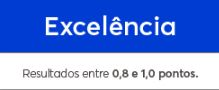
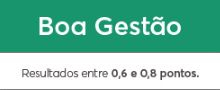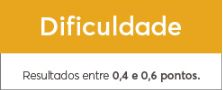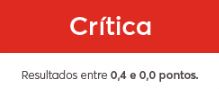

(array([19., 16., 17., 18., 18., 17., 16., 17., 16., 17.]),
 array([  0. ,  16.4,  32.8,  49.2,  65.6,  82. ,  98.4, 114.8, 131.2,
        147.6, 164. ]),
 <BarContainer object of 10 artists>)

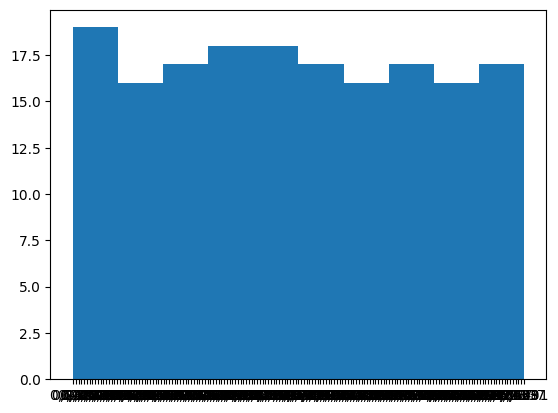

In [12]:
plt.hist(df_treinamento_supervisionado['IFGF'])

# Classificadores
### Cada grupo deverá escolher um dos seguintes algoritmos de aprendizagem para utilizar no trabalho:

* K-Means
* K-Nearest Neighbor (KNN)
* Regressão Linear
* Regressão Logística
* Árvore de Decisão
* Naïve Bayes
* Suport Vector Machine (SVM)
* Redes Neurais


Escolhemos Redes Neurais para esse desafio

# Seminário e Relatório
### Montem um seminário sobre o classificador escolhido, explicando seu funcionamento e os principais parâmetros que devem ser configurados. O seminário deve ter no máximo 15 minutos de duração.
### Por fim, apresente o resultado da classificação das instâncias desconhecidas, criando um relatório de como foram realizadas as etapas de criação de modelo de classificação, treino, teste, parametrização, e o que mais for importante para o entendimento

# Ferramentas
### Utilize uma das ferramentas para realizar os experimentos:
- Laws Miner: https://alexandreronald.shinyapps.io/LawsMiner/
- WEKA: https://www.cs.waikato.ac.nz/ml/weka/
- R: https://www.r-project.org/
- Orange: https://orangedatamining.com/
- SciKit Learn: https://scikit-learn.org/stable/
- Ou faça sua própria implementação.


# Código


## Importando bibliotecas

In [198]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

## Importação dos dados

In [199]:
base_de_dados = pd.read_csv('/content/drive/MyDrive/IA/Base_Treinamento_Supervisionado.csv', encoding="ISO-8859-1",sep=";")

In [200]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Município                                                171 non-null    object
 1   IFGF                                                     171 non-null    object
 2   Total de receitas realizadas (R$x1000)                   171 non-null    object
 3   Total de despesas empenhadas (R$x1000)                   171 non-null    object
 4   IDHm                                                     171 non-null    object
 5   PIB per capita                                           171 non-null    object
 6   Percentual das receitas oriundas de fontes externas (%)  126 non-null    object
 7   Área territorial                                         171 non-null    int64 
 8   População                               

In [201]:
base_de_dados.isnull().sum()

Município                                                   0
IFGF                                                        0
Total de receitas realizadas (R$x1000)                      0
Total de despesas empenhadas (R$x1000)                      0
IDHm                                                        0
PIB per capita                                              0
Percentual das receitas oriundas de fontes externas (%)    45
Área territorial                                            0
População                                                   0
Pessoal ocupado                                             0
Percentual população ocupada                                0
Área Urbanizada                                             0
Salário Médio dos trabalhadores (xSalário mínimo)           0
Matrículas no ensino fundamental                            0
Matrículas no ensino médio                                  0
Docentes no ensino fundamental                              0
Docentes

existem 45 ocorrencias de <code>Percentual das receitas oriundas de fontes externas (%)</code> e 18 <code>Mortalidade Infantil</code> não informadas

## Visualizando dados importados

In [202]:
base_de_dados

,Município,IFGF,Total de receitas realizadas (R$x1000),Total de despesas empenhadas (R$x1000),IDHm,PIB per capita,Percentual das receitas oriundas de fontes externas (%),Área territorial,População,Pessoal ocupado,Percentual população ocupada,Área Urbanizada,Salário Médio dos trabalhadores (xSalário mínimo),Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,Mortalidade Infantil
0,Açailândia,"0,6772","276417,09","247664,14","0,672","23683,22","74,8",5805159,113783,16354,"14,5","28,63","2,2",16830,4379,771,274,"13,04"
1,Altamira do Maranhão,"0,2418","28548,43","24977,85","0,549","7512,63","97,6",524374,8250,326,4,"1,45","1,9",1140,234,111,8,NaN
2,Alto Alegre do Pindaré,"0,387","70794,78","68523,7","0,558","7221,77","90,2",1875901,31967,1260,"3,9","5,52","1,9",5014,1592,325,107,"20,45"
3,Alto Parnaíba,"0,4069","34241,63","32154,06","0,633","43877,65","94,8",11127384,11233,1165,"10,4","3,07","1,8",1861,333,130,14,"20,94"
4,Amarante do Maranhão,"0,3227","74474,98","67136,51","0,555","8010,3","95,9",7439615,42017,1592,"3,8","9,44","1,7",7290,1370,556,116,"17,83"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Vargem Grande,"0,297","95867,34","92155,89","0,542","6630,45",NaN,1958702,57813,2575,"4,5","7,96",2,8200,1740,346,136,"9,78"
167,Viana,"0,3078","92120,11","89952,74","0,618","8663,99","94,8",1166745,52852,2521,"4,8","8,8","1,9",8708,2298,511,94,"14,07"
168,Vitória do Mearim,"0,433","92120,11","60752,47","0,596","7895,55","91,5",716719,32956,1558,"4,7","6,4","1,9",5296,1685,361,72,"10,89"
169,Vitorino Freire,"0,3137","92120,11","62014,71","0,57","8444,18",NaN,1193385,31520,2098,"6,7","6,57",2,4563,1367,375,67,"16,24"



## Tratamento dos dados

In [203]:
# Substituir vírgulas por pontos em todas as colunas
base_de_dados = base_de_dados.replace(',', '.', regex=True)

municipios_criticos = {}
for i,j in zip(base_de_dados['IFGF'], base_de_dados['Município']):
  if(float(i)<0.4):
    municipios_criticos[j] = i

base_de_dados = base_de_dados.drop('Município', axis=1)

# Converter todas as colunas para tipo float
base_de_dados = base_de_dados.astype(float)

In [204]:
media_perc = base_de_dados['Percentual das receitas oriundas de fontes externas (%)'].median()
media_mi = base_de_dados['Mortalidade Infantil'].median()

values = {'Percentual das receitas oriundas de fontes externas (%)': media_perc, 'Mortalidade Infantil': media_mi}

base_de_dados = base_de_dados.fillna(value=values)

In [205]:
result = []

for i in base_de_dados['IFGF']:
  if i<0.4:
    result.append(1)
  else:
    result.append(0)

base_de_dados['IFGF'] = result

## Visualização dos dados tratados

In [206]:
base_de_dados

,IFGF,Total de receitas realizadas (R$x1000),Total de despesas empenhadas (R$x1000),IDHm,PIB per capita,Percentual das receitas oriundas de fontes externas (%),Área territorial,População,Pessoal ocupado,Percentual população ocupada,Área Urbanizada,Salário Médio dos trabalhadores (xSalário mínimo),Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,Mortalidade Infantil
0,0,276417.09,247664.14,0.672,23683.22,74.8,5805159.0,113783.0,16354.0,14.5,28.63,2.2,16830.0,4379.0,771.0,274.0,13.04
1,1,28548.43,24977.85,0.549,7512.63,97.6,524374.0,8250.0,326.0,4.0,1.45,1.9,1140.0,234.0,111.0,8.0,14.29
2,1,70794.78,68523.70,0.558,7221.77,90.2,1875901.0,31967.0,1260.0,3.9,5.52,1.9,5014.0,1592.0,325.0,107.0,20.45
3,0,34241.63,32154.06,0.633,43877.65,94.8,11127384.0,11233.0,1165.0,10.4,3.07,1.8,1861.0,333.0,130.0,14.0,20.94
4,1,74474.98,67136.51,0.555,8010.30,95.9,7439615.0,42017.0,1592.0,3.8,9.44,1.7,7290.0,1370.0,556.0,116.0,17.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,95867.34,92155.89,0.542,6630.45,95.7,1958702.0,57813.0,2575.0,4.5,7.96,2.0,8200.0,1740.0,346.0,136.0,9.78
167,1,92120.11,89952.74,0.618,8663.99,94.8,1166745.0,52852.0,2521.0,4.8,8.80,1.9,8708.0,2298.0,511.0,94.0,14.07
168,0,92120.11,60752.47,0.596,7895.55,91.5,716719.0,32956.0,1558.0,4.7,6.40,1.9,5296.0,1685.0,361.0,72.0,10.89
169,1,92120.11,62014.71,0.570,8444.18,95.7,1193385.0,31520.0,2098.0,6.7,6.57,2.0,4563.0,1367.0,375.0,67.0,16.24


## Transformação dos dados

In [132]:
X = base_de_dados.iloc[:, 1:17].values

X

array([[2.7641709e+05, 2.4766414e+05, 6.7200000e-01, ..., 7.7100000e+02,
        2.7400000e+02, 1.3040000e+01],
       [2.8548430e+04, 2.4977850e+04, 5.4900000e-01, ..., 1.1100000e+02,
        8.0000000e+00, 1.4290000e+01],
       [7.0794780e+04, 6.8523700e+04, 5.5800000e-01, ..., 3.2500000e+02,
        1.0700000e+02, 2.0450000e+01],
       ...,
       [9.2120110e+04, 6.0752470e+04, 5.9600000e-01, ..., 3.6100000e+02,
        7.2000000e+01, 1.0890000e+01],
       [9.2120110e+04, 6.2014710e+04, 5.7000000e-01, ..., 3.7500000e+02,
        6.7000000e+01, 1.6240000e+01],
       [9.2120110e+04, 8.4989720e+04, 5.9500000e-01, ..., 4.8300000e+02,
        1.5400000e+02, 1.9890000e+01]])

In [133]:
y = base_de_dados.iloc[:, 0].values

y

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.90675813,  0.881531  ,  2.05160433, ...,  0.74859994,
         0.73627771, -0.32168608],
       [-0.21476769, -0.23651976, -0.65093177, ..., -0.39371816,
        -0.29144279, -0.14534119],
       [-0.02361657, -0.01788721, -0.45318522, ..., -0.02333017,
         0.09105469,  0.72368644],
       ...,
       [ 0.07287368, -0.05690456,  0.38174463, ...,  0.03897809,
        -0.04417169, -0.6249993 ],
       [ 0.07287368, -0.05056718, -0.18952317, ...,  0.06320908,
        -0.06348975,  0.12975684],
       [ 0.07287368,  0.06478446,  0.35977279, ...,  0.25013386,
         0.2726444 ,  0.64468393]])

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

O modelo sequencial é uma pilha linear de camadas, onde as camadas são adicionadas sequencialmente.


## Criação da rede neural

In [171]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(16, )))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=500, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units=500, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Adicionamos uma camada densa (fully connected) à rede neural com 400 unidades (neurônios). A função de ativação utilizada é a função ReLU (Rectified Linear Unit). A camada possui input_shape=(16, ), o que indica que a entrada tem 16 características.


In [172]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               6800      
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 500)               200500    
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               250500    
                                                                 
 dropout_11 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [173]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

Estamos usando o otimizador Adam, que é uma combinação do algoritmo RMSProp com o algoritmo de momento.

## Treinamento da rede

In [174]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 50)

Epoch 1/50
5/5 [==============================] - 2s 7ms/step - loss: 0.7168 - accuracy: 0.6397
Epoch 2/50
5/5 [==============================] - 0s 24ms/step - loss: 0.6394 - accuracy: 0.6765
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6060 - accuracy: 0.6985
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5809 - accuracy: 0.7206
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 0.5792 - accuracy: 0.7206
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5545 - accuracy: 0.7426
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5482 - accuracy: 0.7500
Epoch 8/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5239 - accuracy: 0.7647
Epoch 9/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5177 - accuracy: 0.7500
Epoch 10/50
5/5 [==============================] - 0s 16ms/step - loss: 0.5188 - accuracy: 0.7353
Epoch 11/50
5/5 [==============

## Visualizando a qualidade do treinamento

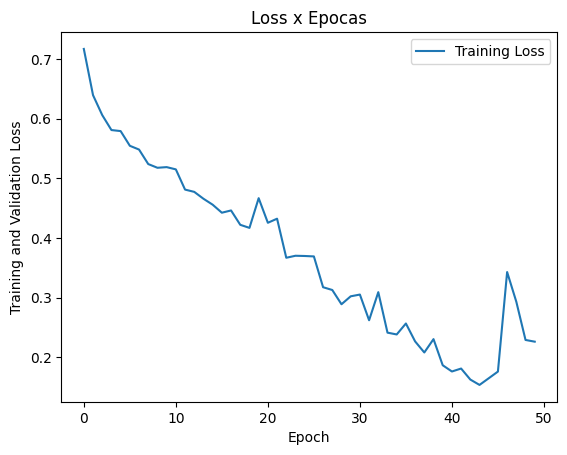

In [223]:
plt.plot(epochs_hist.history['loss'])
plt.title('Loss x Epocas')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

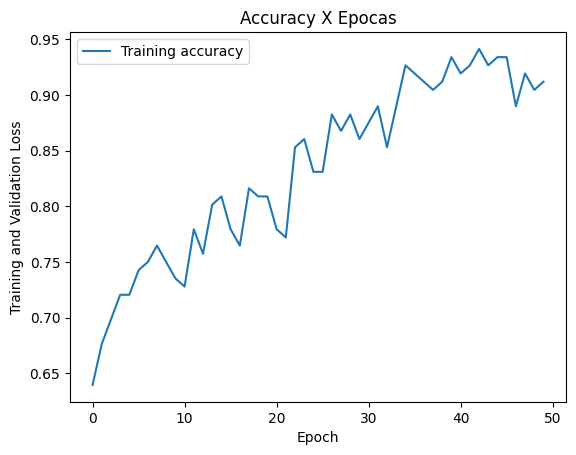

In [224]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Accuracy X Epocas')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training accuracy'])

## Data Visualization!

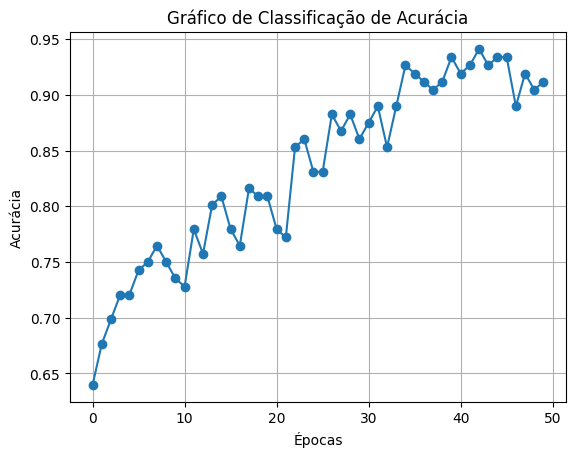

In [177]:
epochs = epochs_hist.epoch
accuracy = epochs_hist.history['accuracy']
loss=epochs_hist.history['loss']

plt.plot(epochs, accuracy, marker='o')  # Gráfico de linha com marcadores circulares
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Gráfico de Classificação de Acurácia')
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()  # Mostra o gráfico

Com o aumento das epocas é perceptivel o aumento da acurácia

## Validação com dados reais

In [178]:
y_pred = classifier.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [179]:
y_pred = (y_pred > 0.5)

Lembre-se de que as previsões retornadas pelo método predict() serão valores contínuos entre 0 e 1, pois estamos usando a função de ativação sigmoid na última camada da rede neural. Se você deseja obter previsões binárias (0 ou 1), você pode aplicar um limiar (threshold) às previsões, por exemplo, usando y_pred = (y_pred > 0.5).astype(int). Isso irá converter os valores de y_pred em 0 ou 1 com base em um limiar de 0.5.

In [180]:
y_pred = np.argmax(y_pred, axis=1)

In [181]:
epochs = epochs_hist.epoch
train_accuracy = epochs_hist.history['accuracy']
val_accuracy = y_pred

5/5 [==============================] - 0s 2ms/step


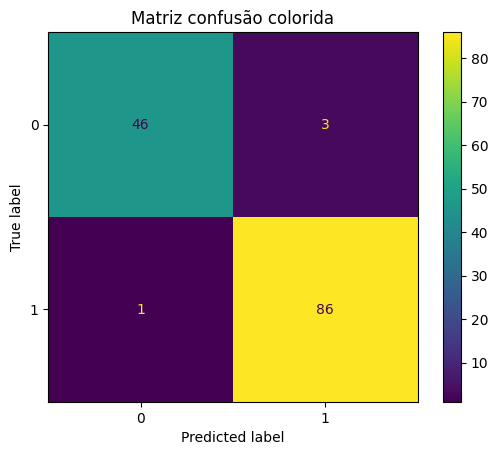

In [226]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.grid(False)
plt.title("Matriz confusão colorida")
plt.show()

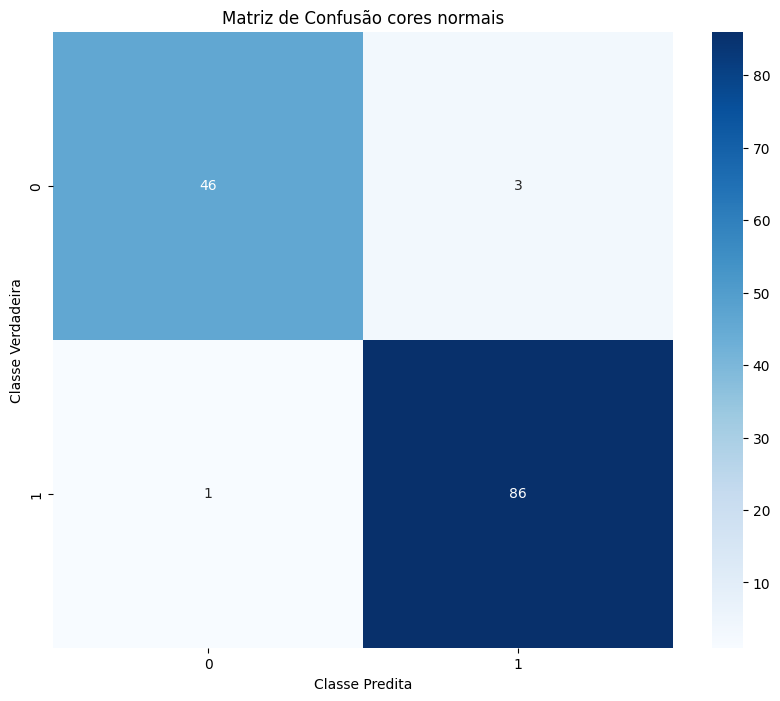

In [225]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão cores normais')
plt.show()

## Importando e visualizando a base de resposta

In [227]:
predict_data = pd.read_csv('/content/drive/MyDrive/IA/base_de_avaliacao.csv',sep=";")

In [208]:
predict_data

,Município,IFGF,Total de receitas realizadas (R$x1000),Total de despesas empenhadas (R$x1000),IDHm,PIB per capita,Percentual das receitas oriundas de fontes externas (%),Área territorial,População,Pessoal ocupado,Percentual população ocupada,Área Urbanizada,Salário Médio dos trabalhadores (xSalário mínimo),Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,Mortalidade Infantil
0,Alto Alegre do Maranhão,?,"48180,12","47273,24","0,554","8770,52","95,4",392750,28066,978,"3,5","6,56","1,5",4260,1166,276,46,"15,11"
1,Arame,?,"69273,85","71709,47","0,521","5902,11",NaN,1789730,47095,2146,"4,6","9,38","2,1",6620,1450,446,78,"12,68"
2,Barão de Grajaú,?,"39740,96","40114,7","0,592","11816,72","97,5",2209414,19026,1581,"8,4","5,19","1,6",2571,735,190,52,"14,98"
3,Cajari,?,"41227,11","34447,37","0,523","5748,61","98,5",662066,19521,642,"3,3","2,04","1,7",3413,673,311,26,"19,61"
4,Conceição do Lago-Açu,?,"35309,92","33722,37","0,512","8146,21","99,1",725664,16559,787,"4,8","2,28","2,4",3428,423,260,17,"20,75"
5,Fernando Falcão,?,"28139,66","26666,09","0,443","8051,5",94,5086589,10559,309,3,"5,93","2,1",2357,387,178,24,"29,79"
6,Governador Nunes Freire,?,"54743,82","56990,05","0,569","8849,43","98,9",1037130,25502,1408,"5,5","4,95","2,3",4444,1061,237,58,"6,94"
7,Humberto de Campos,?,"58526,41","53163,82","0,535","5831,58","97,3",1714625,29143,1795,"6,2","6,3","1,8",5970,1268,332,44,"17,54"
8,Igarapé Grande,?,"26782,92","26927,56","0,614","9132,96","97,4",346218,11453,527,"4,6","2,07",2,1506,283,126,14,"17,54"
9,João Lisboa,?,"52757,39","50472,16","0,641","9874,08","95,9",1137104,23677,1720,"7,2","7,28","1,6",4549,933,310,45,"16,71"


## Transformando dados de predição

In [209]:
mun = []
for i in predict_data['Município']:
  mun.append(i)

In [210]:
predict_data = predict_data.drop(['Município'], axis = 1)
predict_data = predict_data.drop(['IFGF'], axis = 1)

In [211]:
# Substituir vírgulas por pontos em todas as colunas
predict_data = predict_data.replace(',', '.', regex=True)

# Converter todas as colunas para tipo float
predict_data = predict_data.astype(float)

values = {'Percentual das receitas oriundas de fontes externas (%)': media_perc, 'Mortalidade Infantil': media_mi}

predict_data = predict_data.fillna(value=values)

## Realizando a predição

In [212]:
scaler_1 = StandardScaler()

x_test_pred = scaler_1.fit_transform(predict_data)
y_test_pred = classifier.predict(x_test_pred)

1/1 [==============================] - 0s 21ms/step


In [213]:
y_test_pred

array([[3.4505209e-01],
       [9.8944932e-01],
       [1.8633738e-06],
       [2.2944449e-01],
       [9.8580337e-01],
       [1.0000000e+00],
       [8.8862145e-01],
       [9.5876926e-01],
       [9.9977380e-01],
       [2.9984005e-02],
       [7.8208327e-01],
       [1.5189089e-01],
       [5.4413629e-01],
       [9.9979502e-01],
       [9.5612146e-02],
       [8.4362906e-01],
       [5.6586194e-01],
       [1.5304832e-10],
       [2.3074256e-01],
       [9.8050565e-01]], dtype=float32)

## Resultado final

In [218]:
y_pred_final = (y_test_pred > 0.5)

criticos = []
normais = []
for i,j in zip(mun, y_pred_final):
  if j[0] == True:
    criticos.append(i)
  else:
    normais.append(i)

y_pred = (y_test > 0.5): Estamos aplicando um limiar de 0.5 às previsões y_test. Essa linha de código cria um novo array y_pred em que os valores maiores que 0.5 são considerados como True (1) e os valores menores ou iguais a 0.5 são considerados como False (0). Isso transforma as previsões contínuas em previsões binárias.

## Conclusões

In [219]:
print('Municicios em estado critico:', len(criticos))
print('Municicios em estado normal:', len(normais))

Municicios em estado critico: 12
Municicios em estado normal: 8


In [221]:
print("Criticos:")
print()
for i in criticos:
  print(i)

Criticos:

Arame
Conceição do Lago-Açu
Fernando Falcão
Governador Nunes Freire
Humberto de Campos
Igarapé Grande
Maracaçumé
Peri Mirim
Presidente Vargas
Santa Luzia do Paruá
São Domingos do Maranhão
Vila Nova dos Martírios


In [222]:
print("Regulares:")
print()
for i in normais:
  print(i)

Regulares:

Alto Alegre do Maranhão
Barão de Grajaú
Cajari
João Lisboa
Morros
Santa Filomena do Maranhão
São José de Ribamar
Satubinha


#### Fontes utilizadas:

- https://www.deeplearningbook.com.br/inicializacao-de-pesos-em-redes-neurais-artificiais/
- https://www.deeplearningbook.com.br/capitulo-26-como-escolher-os-hiperparametros-de-uma-rede-neural/
- http://leg.ufpr.br/~lucambio/Nonparam/NparamV.html
- https://sites.icmc.usp.br/andre/research/neural/
- https://repositorio.ufu.br/bitstream/123456789/17967/1/AnaliseDesempenhoRedes.pdf
- https://ele.ufes.br/sites/engenhariaeletrica.ufes.br/files/field/anexo/kaio_g_utsch.pdf
- https://www.deeplearningbook.com.br/inicializacao-de-pesos-em-redes-neurais-artificiais/
- https://sites.icmc.usp.br/andre/research/neural/
- https://www.sas.com/pt_br/insights/analytics/neural-networks.html#:~:text=História%20das%20redes%20neurais,neural%20simples%20com%20circuitos%20elétricos
- https://www.deeplearningbook.com.br/uma-breve-historia-das-redes-neurais-artificiais/
- https://medium.com/brasil-ai/entendendo-o-funcionamento-de-uma-rede-neural-artificial-4463fcf44dd0
- https://lamfo-unb.github.io/2017/07/27/tres-tipos-am/
- https://playground.tensorflow.org/#activation=linear&batchSize=16&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=15&networkShape=3,2&seed=0.35029&showTestData=false&discretize=false&percTrainData=30&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false